Focus on ED for now - simple stuff first!!
Arrival and departure curves from ED
	- Comapre UHS and PHT
	- Weekday vs. weekend

Arrivals/period - overtime

Summary stats of variation for:
Arrival - first clinitian
Triage - …
DTA - admission
 - how vary by time of day/year

Seasonality stats?


In [1]:
#import dep
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# local import
#from hospital import *

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is EE63-178E

 Directory of C:\Users\bjk1y13\OneDrive - University of Southampton\MH000_HHFT_flow\4_Analysis\flosp\hh(ED_slide_packs_code)

30/05/2018  14:31    <DIR>          .
30/05/2018  14:31    <DIR>          ..
29/05/2018  13:59    <DIR>          .ipynb_checkpoints
25/05/2018  11:06             5,419 hhIO.py
30/05/2018  14:31         1,137,539 hhMAIN-Copy1.ipynb
28/05/2018  13:48         1,137,986 hhMAIN.ipynb
               3 File(s)      2,280,944 bytes
               3 Dir(s)  359,420,780,544 bytes free


In [3]:
pat = pd.read_pickle('./../../../3_Data/processed/hhEDpat.pkl')

pat = hh.pat.get_ED()

In [4]:
pat.shape

(567635, 36)

In [5]:
pat.shape

(567635, 36)

In [6]:
pat.head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,depart_weekday_name,depart_year,depart_date,first_adm_request_datetime,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait
0,489709,43,Female,BNHH,2012-08-01 00:04:00,2.0,2012-08-01 00:18:00,2012-08-01 02:24:00,NaN,NaN,...,Wednesday,2012,2012-08-01,NaT,14.0,140.0,NaN,NaN,NaN,80.0


In [7]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait'],
      dtype='object')

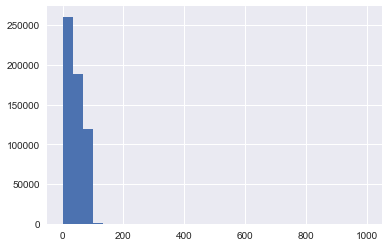

In [8]:
pat.age.hist(bins=30)

In [9]:
pat.age.describe()

count    567635.000000
mean         40.388787
std          26.523965
min           0.000000
25%          19.000000
50%          37.000000
75%          62.000000
max         999.000000
Name: age, dtype: float64

# Cleaning

check for long wait times

In [10]:
pat[pat.waiting_time > 7*24*60].shape

(0, 36)

Also some patients that have negative wait times

In [11]:
pat[pat.waiting_time < 0].shape

(10, 36)

pat = pat[pat.waiting_time > 0]

pat.reset_index(drop=True,inplace=True)

# tables 1,2,3

In [12]:
yearly = pat.groupby('arrive_year').agg({'hosp_patid':'count','adm_flag':'sum'})

yearly.rename(columns={'adm_flag':'ED admissions','hosp_patid':'ED attendances'},inplace=True)

yearly['conversion ratio'] = 100* yearly['ED admissions'] / yearly['ED attendances']

In [13]:
yearly.round(1)

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2012,37211,9370,25.2
2013,93024,23189,24.9
2014,101688,23898,23.5
2015,103547,26563,25.7
2016,110075,29702,27.0
2017,110887,29798,26.9
2018,11203,3526,31.5


In [14]:
(101688 - 93024)/93024

0.09313725490196079

In [15]:
yearly[['ED attendances','ED admissions']].round()

,ED attendances,ED admissions
arrive_year,,
2012,37211,9370
2013,93024,23189
2014,101688,23898
2015,103547,26563
2016,110075,29702
2017,110887,29798
2018,11203,3526


In [16]:
29/4

7.25

In [17]:
(yearly[['ED attendances','ED admissions']].pct_change()*100).round(1)

,ED attendances,ED admissions
arrive_year,,
2012,NaN,NaN
2013,150.0,147.5
2014,9.3,3.1
2015,1.8,11.2
2016,6.3,11.8
2017,0.7,0.3
2018,-89.9,-88.2


In [18]:
(yearly.loc[[2013,2017]].pct_change()*100).round(1)

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2013,NaN,NaN,NaN
2017,19.2,28.5,7.8


In [19]:
yearly.loc[[2013,2017]].pct_change()*100/4

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2013,NaN,NaN,NaN
2017,4.800643,7.125146,1.950044


# plot 1,

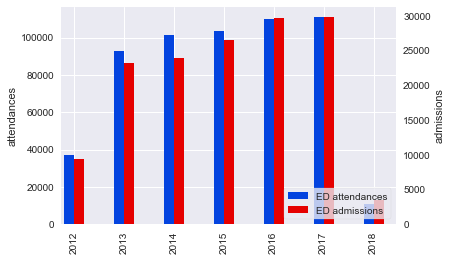

In [20]:
ax = plt.subplot()

width= 0.2

yearly['ED attendances'].plot.bar(ax=ax,position=1,width=width,color='xkcd:blue',figsize=(6,4))
ax2 = ax.twinx()
yearly['ED admissions'].plot.bar(ax=ax2,position=0,width=width,color='xkcd:red')
ax2.grid(False);

ax.set_ylabel('attendances');
ax2.set_ylabel('admissions');
ax.set_xlabel('')
## sort legend
#lns = lns1+lns2
#labs = ['attendances','admissions']

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right',frameon=True)

#ax.legend(lns, labs, loc=0)
#ax.legend(labs,frameon=True);


In [21]:
% matplotlib inline

In [24]:
plt.show()

In [27]:
ax.savefig('./test.png')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [26]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is EE63-178E

 Directory of C:\Users\bjk1y13\OneDrive - University of Southampton\MH000_HHFT_flow\4_Analysis\flosp\hh(ED_slide_packs_code)

31/05/2018  15:43    <DIR>          .
31/05/2018  15:43    <DIR>          ..
29/05/2018  13:59    <DIR>          .ipynb_checkpoints
25/05/2018  11:06             5,419 hhIO.py
31/05/2018  15:43         1,137,448 hhMAIN-Copy1.ipynb
28/05/2018  13:48         1,137,986 hhMAIN.ipynb
31/05/2018  15:43             1,274 test.png
               4 File(s)      2,282,127 bytes
               3 Dir(s)  359,465,095,168 bytes free


# function to make age groups

# age groups

In [51]:
pat['age_group'] = pd.cut(pat.age, bins = [-1, 18, 65,200], right=False, labels=["0-17", "18-64", "65+"])

In [52]:
pat.age_group.value_counts()

18-64    308376
0-17     130634
65+      128624
Name: age_group, dtype: int64

# tables 4a, 4b

In [53]:
df_atten = pat.groupby(['arrive_year','age_group']).count()['hosp_patid'].unstack()
df_atten

age_group,0-17,18-64,65+
arrive_year,,,
2012,8686,20698,7827
2013,22143,51295,19586
2014,23912,55779,21997
2015,23823,56039,23684
2016,24973,59170,25932
2017,24804,59358,26725
2018,2293,6037,2873


In [54]:
df_atten.apply(lambda x: x['65+']/x.sum(),axis=1)

arrive_year
2012    0.210341
2013    0.210548
2014    0.216319
2015    0.228729
2016    0.235585
2017    0.241011
2018    0.256449
dtype: float64

In [55]:
df_atten.apply(lambda x: x['18-64']/x.sum(),axis=1)

arrive_year
2012    0.556233
2013    0.551417
2014    0.548531
2015    0.541199
2016    0.537543
2017    0.535302
2018    0.538874
dtype: float64

In [56]:
df_atten.apply(lambda x: x['0-17']/x.sum(),axis=1)

arrive_year
2012    0.233426
2013    0.238035
2014    0.235151
2015    0.230072
2016    0.226873
2017    0.223687
2018    0.204677
dtype: float64

In [57]:
df = pat[pat.adm_flag == 1].groupby(['arrive_year','age_group']).count()['hosp_patid'].unstack()[1:-1]

In [58]:
df

age_group,0-17,18-64,65+
arrive_year,,,
2013,3712,9465,10012
2014,3613,9451,10834
2015,3717,10552,12294
2016,4613,11731,13358
2017,4341,11740,13717


In [59]:
df.columns.get_level_values(0)

CategoricalIndex(['0-17', '18-64', '65+'], categories=['0-17', '18-64', '65+'], ordered=True, name='age_group', dtype='category')

In [60]:
for i in df.columns:
    col_name = i + ' (perc)'
    #df[col_name] = 
    df.apply(lambda x : x[i]/x.sum(),axis=1 ) #,axis=1)

In [61]:
df.iloc[1].sum()

23898

In [62]:
df.apply(lambda x: x['18-64']/x.sum(),axis=1)

arrive_year
2013    0.408168
2014    0.395472
2015    0.397244
2016    0.394957
2017    0.393986
dtype: float64

In [63]:
df.apply(lambda x: x['18-64']/x.sum(),axis=1)

arrive_year
2013    0.408168
2014    0.395472
2015    0.397244
2016    0.394957
2017    0.393986
dtype: float64

In [64]:
df.apply(lambda x: x['0-17']/x.sum(),axis=1)

arrive_year
2013    0.160076
2014    0.151184
2015    0.139931
2016    0.155309
2017    0.145681
dtype: float64

In [65]:
df.sum()

age_group
0-17     19996
18-64    52939
65+      60215
dtype: int64

In [66]:
df['18-64']

arrive_year
2013     9465
2014     9451
2015    10552
2016    11731
2017    11740
Name: 18-64, dtype: int64

# plot 2,3

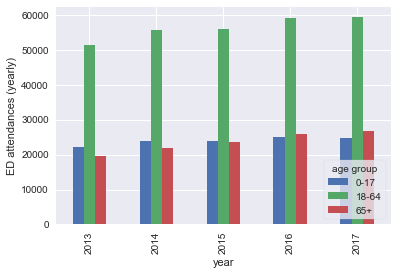

In [67]:
ax = plt.subplot()
pat.groupby(['arrive_year','age_group']).count()['hosp_patid'].unstack()[1:-1].plot(kind='bar',ax=ax);
ax.set_ylabel('ED attendances (yearly)');
ax.set_xlabel('year');
#ax.set_xticks([2013,2014,2015,2016,2017]);
ax.legend(title = 'age group',frameon=True,loc='lower right');


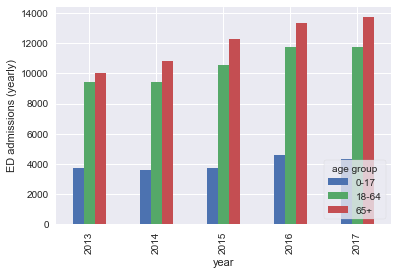

In [68]:
ax = plt.subplot()
pat[pat.adm_flag == 1].groupby(['arrive_year','age_group']).count()['hosp_patid'].unstack()[1:-1].plot(kind='bar',ax=ax);
ax.set_ylabel('ED admissions (yearly)');
ax.set_xlabel('year');
#ax.set_xticks([2013,2014,2015,2016,2017]);
ax.legend(title = 'age group',frameon=True,loc='lower right');


# filter for sensible waiting times

In [69]:
wait_cols = ['arr_triage_wait','arr_dr_wait','dr_adm_req_wait','adm_req_dep_wait','dr_dep_wait']
dt_cols = ['arrive_datetime','first_triage_datetime','first_dr_datetime','first_adm_request_datetime','depart_datetime']

In [70]:
pat[wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,563648.000000,567571.000000,118593.000000,118594.000000,567571.000000
mean,12.043955,76.126664,64.332233,130.702723,89.456593
std,512.054942,521.529433,1120.810694,175.462916,529.560274
min,-11520.000000,-10009.000000,-383756.783333,-1435.383333,-383727.000000
25%,2.000000,26.000000,24.116667,44.616667,22.000000
50%,7.000000,59.000000,61.050000,94.200000,58.000000
75%,15.000000,110.000000,107.516667,174.662500,129.000000
max,383767.000000,383906.000000,1704.950000,5318.550000,10072.000000


how many patients have negative adm request to adm times? -20 %!

In [71]:
pat[pat.adm_req_dep_wait < 0].shape

(6111, 37)

In [72]:
118/6

19.666666666666668

Some of these massive wait times are due to errors in dates etc. Lets see how many have crazy wait times... 

In [73]:
exclude_index = pat.query('arr_triage_wait < 0 or arr_dr_wait < 0 or arr_adm_req_wait < 0 or waiting_time < 0'
                          +'or arr_triage_wait > 24*60 or arr_dr_wait > 24*60 or arr_adm_req_wait > 24*60'
                          'or waiting_time > 24*60' + 'or adm_req_dep_wait < 0 or dr_adm_req_wait <0 or dr_dep_wait < 0'
                          ).index


dr_dep_wait < 0 loses about 50% (20k) of these!!!

In [74]:
exclude_index.shape

(43911,)

In [75]:
567/43

13.186046511627907

In [76]:
1440/60

24.0

In [77]:
pat2 = pat.loc[~pat.index.isin(exclude_index)]

In [78]:
pat2[wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,520051.000000,523661.000000,95447.000000,95448.000000,523661.000000
mean,11.485235,74.672011,80.446567,135.471532,92.522939
std,16.392266,60.071161,59.534138,142.635745,105.611671
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,38.583333,48.095833,25.000000
50%,7.000000,59.000000,69.316667,91.000000,61.000000
75%,15.000000,110.000000,110.300000,161.016667,130.000000
max,1440.000000,935.000000,1234.300000,1370.500000,1423.000000


In [79]:
pat2[pat2.dr_dep_wait < 0].shape

(0, 37)

# plot 4,5

note think need filter for suitable waiting times here (pat2)

In [85]:
wait_col2 = ['arr_dr_wait','dr_adm_req_wait','adm_req_dep_wait','dr_dep_wait']

In [86]:
temp = pat2[pat2.arrive_year == 2017].groupby('adm_flag')[wait_col2].median()
temp.loc[1,'dr_dep_wait'] = np.nan
temp

,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
adm_flag,,,,
0,69.0,NaN,NaN,47.0
1,59.0,71.066667,83.95,NaN


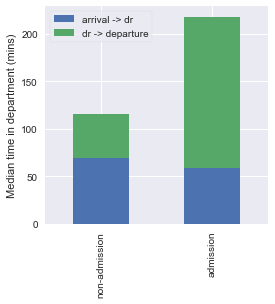

In [87]:
ax = plt.subplot()
pat2[pat2.arrive_year == 2017].groupby('adm_flag')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax,figsize=(4,4))
ax.set_xticklabels(['non-admission','admission']);
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.legend(['arrival -> dr','dr -> departure'],frameon=True);


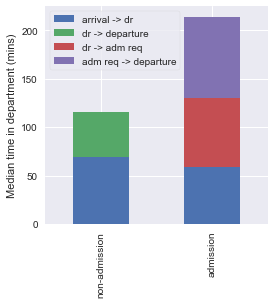

In [88]:
ax = plt.subplot()
temp[['arr_dr_wait', 'dr_dep_wait', 'dr_adm_req_wait', 'adm_req_dep_wait']].plot.bar(stacked=True,ax=ax,figsize=(4,4))
ax.set_ylabel('Median patient waiting time (mins)');
ax.legend(['arrival -> dr','dr -> departure','dr -> adm req','adm req -> departure'],loc='upper left',frameon=True);
ax.set_xticklabels(['non-admission','admission']);
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.set_yticks(np.arange(0,225,50));

In [89]:
temp

,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
adm_flag,,,,
0,69.0,NaN,NaN,47.0
1,59.0,71.066667,83.95,NaN


In [90]:
83/(59+71+84)

0.3878504672897196

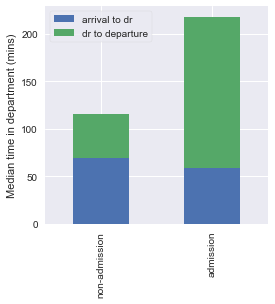

In [91]:
ax = plt.subplot()
pat2[pat2.arrive_year == 2017].groupby('adm_flag')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax,figsize=(4,4))
ax.set_xticklabels(['non-admission','admission']);
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.legend(['arrival to dr','dr to departure'],frameon=True);


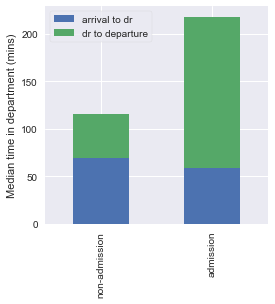

In [92]:
ax = plt.subplot()
pat2[pat2.arrive_year == 2017].groupby('adm_flag')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax,figsize=(4,4))
ax.set_xticklabels(['non-admission','admission']);
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.legend(['arrival to dr','dr to departure'],frameon=True);


# plot 6

In [184]:
pat2[pat2.adm_flag == 0].groupby('arrive_year')[wait_col2[0],wait_col2[3]].median()[1:-1]

,arr_dr_wait,dr_dep_wait
arrive_year,,
2013,66.0,45.0
2014,49.0,43.0
2015,48.0,41.0
2016,76.0,40.0
2017,69.0,47.0


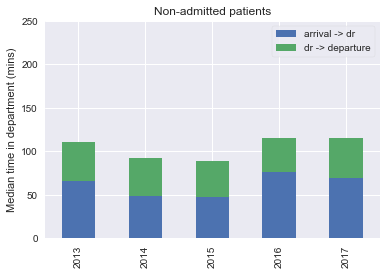

In [185]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0].groupby('arrive_year')[wait_col2[0],wait_col2[3]].median()[1:-1].plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250]);
ax.set_xlabel('');
ax.legend(['arrival -> dr','dr -> departure'],frameon=True);
ax.set_title('Non-admitted patients');

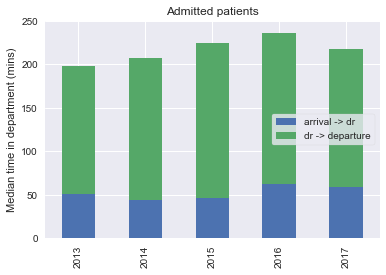

In [186]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_year')[wait_col2[0],wait_col2[3]].median()[1:-1].plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.legend(['arrival -> dr','dr -> departure'],frameon=True,loc='center right');
ax.set_title('Admitted patients');
ax.set_ylim([0,250]);

# plot 8,9

looks like i wrote some fuctions for these which are down below...worht a look.

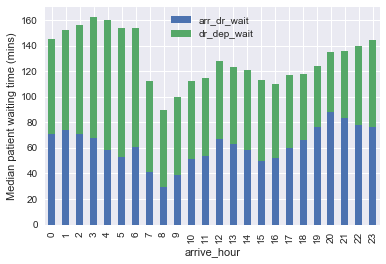

In [192]:
ax = plt.subplot()
pat2.groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');

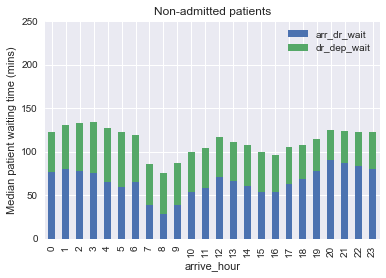

In [193]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
ax.set_ylim([0,250]);
ax.set_title('Non-admitted patients');

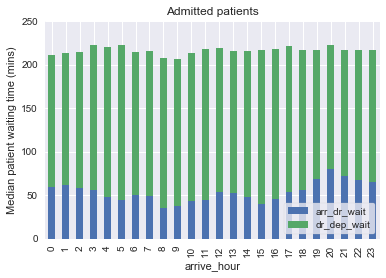

In [194]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
ax.legend(loc='lower right',frameon=True)
ax.set_ylim([0,250]);
ax.set_title('Admitted patients');

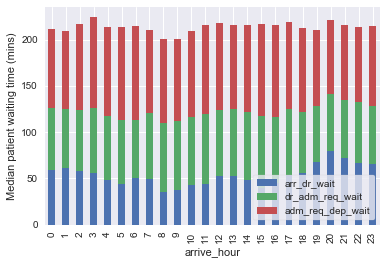

In [195]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_hour')[wait_col2[0:3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
ax.legend(loc='lower right',frameon=True);

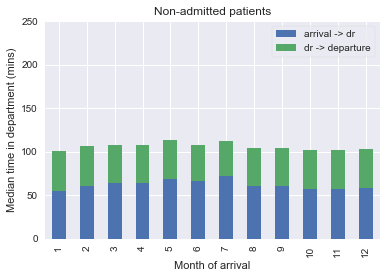

In [196]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0].groupby('arrive_month')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250])
ax.legend(['arrival -> dr','dr -> departure'],frameon=True);
ax.set_title('Non-admitted patients');
ax.set_xlabel('Month of arrival');

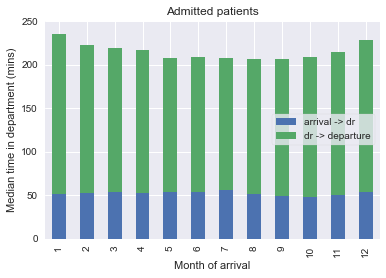

In [197]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_month')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250])
ax.legend(['arrival -> dr','dr -> departure'],frameon=True,loc='center right');
ax.set_title('Admitted patients');
ax.set_xlabel('Month of arrival');

# plot 7 

In [198]:
wait_col = ['arr_dr_wait','dr_dep_wait']

In [199]:
df.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait', 'age_group'],
      dtype='object')

In [200]:
year = 2013
temp = pat2[pat2.arrive_year == year][['arr_dr_wait','dr_dep_wait','adm_flag']].pivot(columns='adm_flag')
temp.head()

arr_dr_wait       dr_dep_wait       
adm_flag           0     1           0      1
19323            6.0   NaN        97.0    NaN
19324           36.0   NaN        56.0    NaN
19325            NaN  32.0         NaN  154.0
19326           55.0   NaN        80.0    NaN
19327           54.0   NaN        44.0    NaN

In [201]:
t1 = temp['arr_dr_wait'][0]
t2 = temp['dr_dep_wait'][0]
t3 = temp['arr_dr_wait'][1]
t4 = temp['dr_dep_wait'][1]

temp = pd.DataFrame(data = dict(t1=t1,t2=t2,t3=t3,t4=t4))

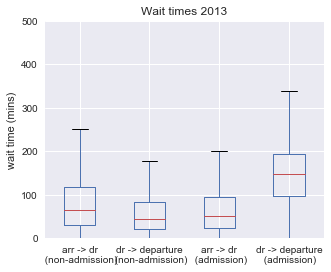

In [202]:
ax = plt.subplot()
temp.plot.box(ax=ax,figsize=(5,4))
ax.set_ylim([0,500]);
ax.set_xticklabels(['arr -> dr\n (non-admission)','dr -> departure\n (non-admission)',
                    'arr -> dr\n (admission)','dr -> departure\n (admission)']);
ax.set_ylabel('wait time (mins)');
ax.set_title('Wait times ' + str(year));

In [203]:
temp.describe()

,t1,t2,t3,t4
count,68160.000000,68160.000000,19919.000000,19919.000000
mean,80.152347,59.963718,67.366685,157.503088
std,60.455589,54.463641,56.075990,100.646551
min,0.000000,0.000000,0.000000,0.000000
25%,30.000000,21.000000,25.000000,97.000000
50%,66.000000,45.000000,51.000000,147.000000
75%,119.000000,84.000000,96.000000,194.000000
max,566.000000,807.000000,585.000000,1423.000000


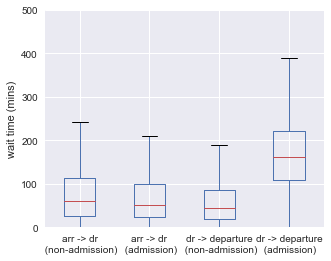

In [204]:
ax = plt.subplot()
pat2[['arr_dr_wait','dr_dep_wait','adm_flag']].pivot(columns='adm_flag').plot.box(ax=ax,figsize=(5,4))
ax.set_ylim([0,500]);
ax.set_xticklabels(['arr -> dr\n (non-admission)',
                    'arr -> dr\n (admission)','dr -> departure\n (non-admission)','dr -> departure\n (admission)']);
ax.set_ylabel('wait time (mins)');

# table 5

In [205]:
temp = pat.groupby(['arrive_year','adm_flag']).sum()['breach_flag'].unstack()[1:-1]
temp['perc_breach_adm'] = 100*temp[1]/(temp[0] + temp[1])
temp.columns.name=None
temp.rename(columns={0:'no. of breach (non-adm)',1:'no. of breach (adm)', 'perc_breach_adm':'% of breach from adm'},inplace=True)
temp.round(0)

,no. of breach (non-adm),no. of breach (adm),% of breach from adm
arrive_year,,,
2013,2575,3671,59.0
2014,1851,4369,70.0
2015,3113,8894,74.0
2016,7021,12169,63.0
2017,4812,9332,66.0


# table 6

In [206]:
pat2.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait', 'age_group'],
      dtype='object')

In [207]:
pat2.groupby(['adm_referral_loc'])[wait_col2].median().sort_values('adm_req_dep_wait',ascending=False).head()

,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
adm_referral_loc,,,,
Thoracic Surgery,96.0,126.833333,221.733333,416.0
Intensive Care,19.0,46.800000,126.116667,192.0
Psychiatry,66.0,53.958333,119.400000,186.0
Fast Track to Specialty,21.0,2.100000,117.550000,144.0
Elderly Care,26.0,55.616667,113.033333,204.0


basignstoke

In [208]:
pat2.site.value_counts()

BNHH    289570
RHCH    234154
Name: site, dtype: int64

In [209]:
pat2[pat2.site == 'BNHH'].groupby(['adm_referral_loc']).median()['adm_req_dep_wait'].sort_values(ascending=False).head().round(0)

adm_referral_loc
Thoracic Surgery    197.0
Intensive Care      135.0
Psychiatry          124.0
General Medicine    111.0
Elderly Care        102.0
Name: adm_req_dep_wait, dtype: float64

In [210]:
agg_f = {'adm_req_dep_wait':['median','count']}

In [211]:
TOP_bas = pat2[(pat2.site == 'BNHH') & (pat2.arrive_year == 2017)].groupby(['adm_referral_loc']).agg(agg_f)['adm_req_dep_wait'].sort_values(ascending=False,by='median').head(10).round(0)

In [212]:
TOP_bas.rename(columns={'median':'average time','count':'no. of patients'})

,average time,no. of patients
adm_referral_loc,,
Intensive Care,127.0,81
Neurosurgery,125.0,5
Medicine and Orthopaedics,123.0,3
Psychiatry,118.0,256
General Medicine,110.0,5521
ENT,97.0,79
Orthopaedics,95.0,1043
Orthopaedics and Surgery,90.0,19
Surgery and Gynaecology,83.0,15


In [213]:
TOP_win = pat2[(pat2.site == 'RHCH') & (pat2.arrive_year == 2017)].groupby(['adm_referral_loc']).agg(agg_f)['adm_req_dep_wait'].sort_values(ascending=False,by='median').head(10).round(0)

In [214]:
TOP_win.rename(columns={'median':'average time','count':'no. of patients'})

,average time,no. of patients
adm_referral_loc,,
Thoracic Surgery,212.0,2
Medicine and Orthopaedics,139.0,2
Fast Track to Specialty,118.0,275
Orthopaedics and Surgery,116.0,53
Intensive Care,109.0,46
Psychiatry,104.0,181
Neurosurgery,103.0,5
General Medicine,95.0,4959
Orthopaedics,92.0,941


# Dev

In [93]:
break

SyntaxError: 'break' outside loop (<ipython-input-93-6aaf1f276005>, line 1)

### Hourly discharge curves - looks like i need pat level df for medians/IQR calcs + groupby is crazy quick!

input: weekday/weekend, range of dates, 

output: 

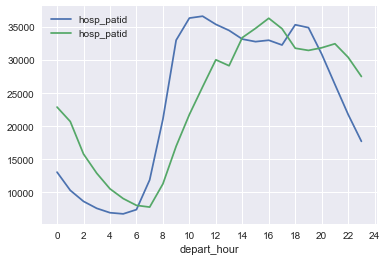

In [94]:
ax = plt.subplot()
arr = pat[['arrive_hour','hosp_patid']].groupby(['arrive_hour']).count()#.plot(ax=ax)
dep = pat[['depart_hour','hosp_patid']].groupby(['depart_hour']).count()#.plot(ax=ax)
arr.plot(ax=ax)
dep.plot(ax=ax)
ax.set_xticks(np.arange(0,25,2));

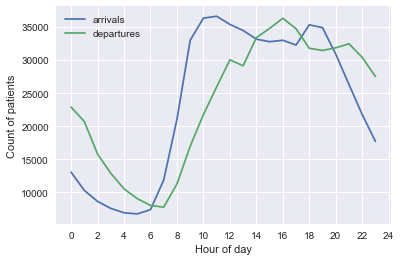

In [95]:
ax = plt.subplot();
arr = pat[['arrive_hour','hosp_patid']].groupby(['arrive_hour']).count()#.plot(ax=ax)
dep = pat[['depart_hour','hosp_patid']].groupby(['depart_hour']).count()#.plot(ax=ax)
arr.plot(ax=ax);
dep.plot(ax=ax);
ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Count of patients');
ax.set_xticks(np.arange(0,25,2));

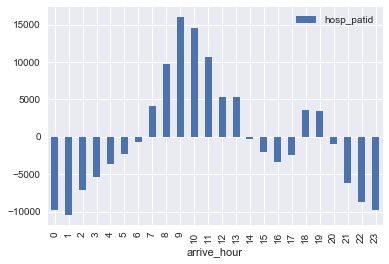

In [96]:
ax1 = plt.subplot();
(arr-dep).plot(kind='bar',ax=ax1);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy');

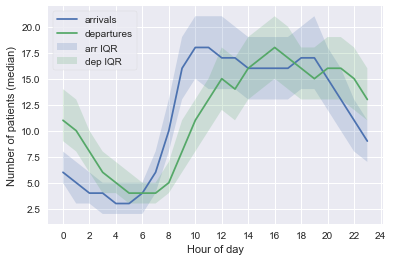

In [97]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()

daily_arr_UQ = daily_arr.groupby(['arrive_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_arr_LQ = daily_arr.groupby(['arrive_hour']).quantile(0.25)#['hosp_patid'].plot() 


daily_dep_UQ = daily_dep.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_dep_LQ = daily_dep.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 


ax = plt.subplot()

daily_arr_m.plot(ax=ax)


ax.fill_between(x = daily_arr_UQ.index,y1=daily_arr_UQ['hosp_patid'],y2=daily_arr_LQ['hosp_patid'],alpha=0.2)

daily_dep_m.plot(ax=ax)
ax.fill_between(x = daily_dep_UQ.index,y1=daily_dep_UQ['hosp_patid'],y2=daily_dep_LQ['hosp_patid'],alpha=0.2)


ax.legend(['arrivals','departures','arr IQR','dep IQR'],frameon=True,loc='upper left');
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (median)');
ax.set_xticks(np.arange(0,25,2));

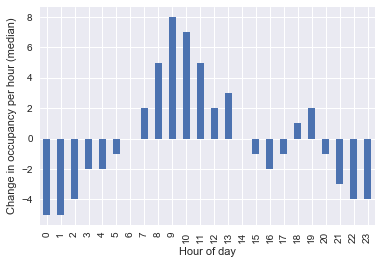

In [98]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour (median)');
ax.legend([])

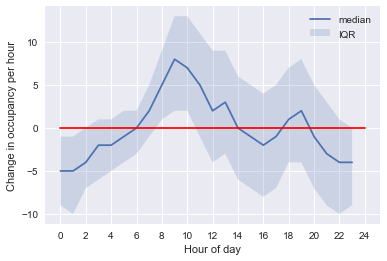

In [99]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(ax=ax);


y1 = (daily_arr_UQ - daily_dep_LQ)['hosp_patid']
y2 = (daily_arr_LQ - daily_dep_UQ)['hosp_patid']

ax.fill_between(x = daily_dep_UQ.index,y1=y1,y2=y2,alpha=0.2)



ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour');
ax.legend(['median','IQR'])
ax.plot([0,24],[0,0],'r')
ax.set_xticks(np.arange(0,25,2));

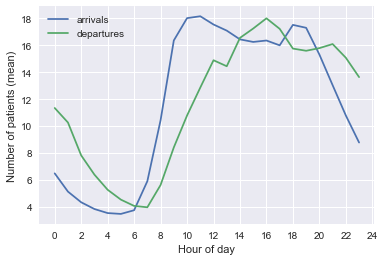

In [100]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_arr = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
daily_dep = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()


#UQ = daily.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
#LQ = daily.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 

ax = plt.subplot()
daily_arr.plot(ax=ax)
daily_dep.plot(ax=ax)

ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (mean)');
ax.set_xticks(np.arange(0,25,2));

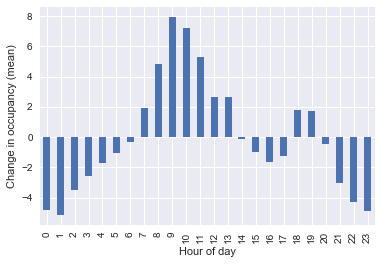

In [101]:
ax = plt.subplot();
(daily_arr-daily_dep).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy (mean)');
ax.legend([])

# Arrival trends over time

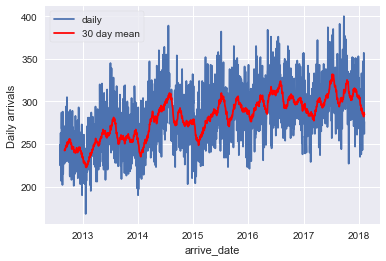

In [102]:
ax = plt.subplot()
pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].plot(ax=ax)
pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Daily arrivals')
ax.legend(['daily','30 day mean'],frameon=True)

In [103]:
labels = pat[['arrive_year','arrive_month','hosp_patid']].groupby(['arrive_year','arrive_month']).count().index

[Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

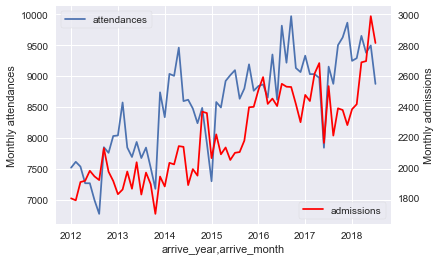

In [104]:
ax = plt.subplot()
pat[['arrive_year','arrive_month','hosp_patid']].groupby(['arrive_year','arrive_month']).count()[:-1].plot(ax=ax,kind='line');
ax2 = ax.twinx()
pat[['arrive_year','arrive_month','adm_flag']].groupby(['arrive_year','arrive_month']).sum()[:-1].plot(ax=ax2,kind='line',style='r');
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Monthly attendances');
ax.legend(['attendances'],frameon=True);
ax2.legend(['admissions'],frameon=True, loc='lower right');
ax2.grid(False)
ax2.set_ylabel('Monthly admissions');
ax.set_xticklabels(np.arange(2011,2019,1))### not this is massively guessed!

Text(0.5,0,'')

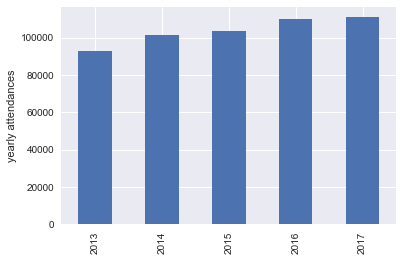

In [105]:
ax = plt.subplot()
pat[['arrive_year','hosp_patid']].groupby('arrive_year').count()[:-1][1:].plot(ax=ax,kind='bar')
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('yearly attendances')
ax.legend_.remove()
ax.set_xlabel('')
#ax.legend(['daily','30 day mean'],frameon=True)

Text(0,0.5,'Total arrivals')

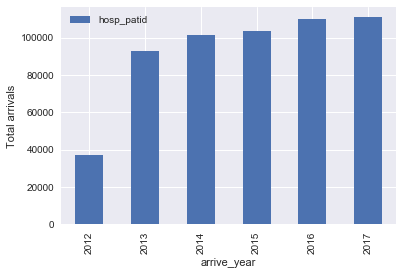

In [106]:
ax = plt.subplot()
pat[['arrive_year','hosp_patid']].groupby('arrive_year').count()[:-1].plot(ax=ax,kind='bar')
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Total arrivals')
#ax.legend(['daily','30 day mean'],frameon=True)

Text(0,0.5,'Total arrivals')

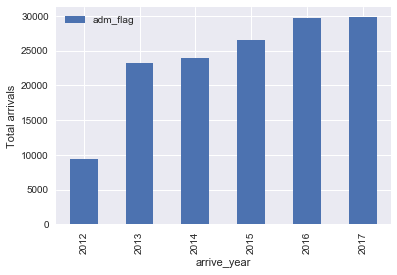

In [107]:
ax = plt.subplot()
pat[['arrive_year','adm_flag']].groupby('arrive_year').sum()[:-1].plot(ax=ax,kind='bar')
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Total arrivals')
#ax.legend(['daily','30 day mean'],frameon=True)

In [108]:
pat[['arrive_year','hosp_patid']].groupby('arrive_year').count()[1:-1]

,hosp_patid
arrive_year,
2013,93024
2014,101688
2015,103547
2016,110075
2017,110887


# Site numbers

In [109]:
pat.groupby(['arrive_year','site']).count()['hosp_patid'].unstack()

site,BNHH,RHCH
arrive_year,,
2012,19323,17888
2013,51065,41959
2014,57723,43965
2015,57681,45866
2016,60911,49164
2017,62025,48862
2018,6016,5187


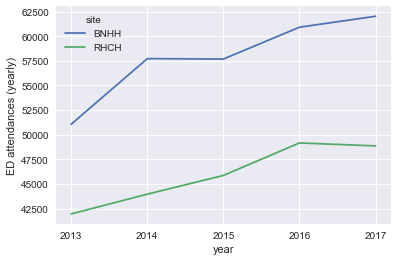

In [110]:
ax = plt.subplot()
pat.groupby(['arrive_year','site']).count()['hosp_patid'].unstack()[1:-1].plot(ax=ax)
ax.set_ylabel('ED attendances (yearly)')
ax.set_xlabel('year')
ax.set_xticks([2013,2014,2015,2016,2017]);

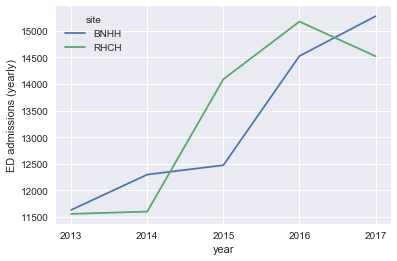

In [111]:
ax = plt.subplot()
pat[pat.adm_flag == 1].groupby(['arrive_year','site']).count()['hosp_patid'].unstack()[1:-1].plot(ax=ax)
ax.set_ylabel('ED admissions (yearly)')
ax.set_xlabel('year')
ax.set_xticks([2013,2014,2015,2016,2017]);

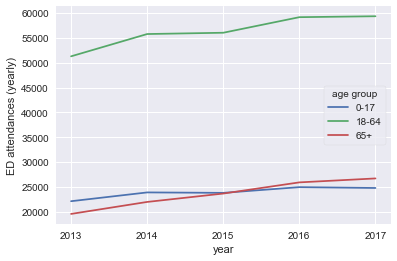

In [112]:
ax = plt.subplot()
pat.groupby(['arrive_year','age_group']).count()['hosp_patid'].unstack()[1:-1].plot(ax=ax)
ax.set_ylabel('ED attendances (yearly)')
ax.set_xlabel('year')
ax.set_xticks([2013,2014,2015,2016,2017]);
ax.legend(title = 'age group',frameon=True)

### breaches/admission link

In [114]:
temp = pat[(pat.arrive_year == 2017) & (pat.adm_flag == 1)].groupby(['arrive_hour']).sum()['breach_flag']#.unstack()[1:-1]
100*temp/temp.sum()


arrive_hour
0     3.096871
1     2.293185
2     1.993142
3     2.164595
4     1.746678
5     2.357480
6     1.896700
7     1.832405
8     2.625375
9     4.061294
10    5.090013
11    6.633090
12    6.086584
13    5.636520
14    5.540077
15    6.536648
16    5.968710
17    5.636520
18    6.408058
19    5.111444
20    4.789970
21    4.468495
22    4.050579
23    3.975568
Name: breach_flag, dtype: float64

In [115]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait', 'age_group'],
      dtype='object')

### Summary stats of variation for: Arrival - first clinitian Triage - … DTA - admission

In [116]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait', 'age_group'],
      dtype='object')

### waiting time plots

In [124]:
#ax = plt.subplot()
pat2.groupby('adm_flag')[wait_col]
#.plot.box(ax=ax)
#ax.set_ylim(0,400);

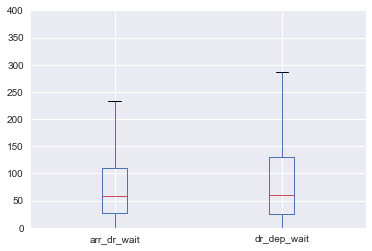

In [125]:
ax = plt.subplot()
pat2[wait_col].plot.box(ax=ax)
ax.set_ylim(0,400);

Text(0.5,1,'')

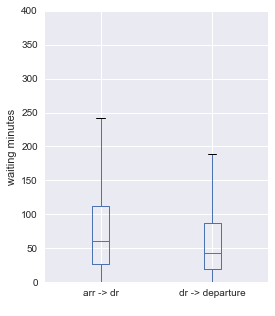

In [126]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0][wait_col].plot.box(ax=ax,figsize=(4,5));
ax.set_ylim(0,400);
ax.set_ylabel('waiting minutes');
ax.set_xticklabels(['arr -> dr\n','dr -> departure\n']);
ax.set_title('')

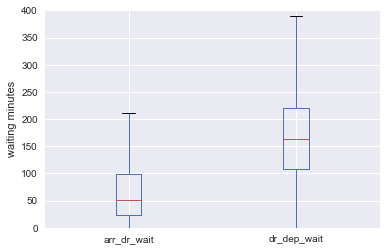

In [127]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1][wait_col].plot.box(ax=ax)
ax.set_ylim(0,400);
ax.set_ylabel('waiting minutes');

In [128]:
pat2[pat2.adm_flag == 0][wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,398072.000000,401501.000000,0.0,0.0,401501.000000
mean,12.214393,76.494721,NaN,NaN,61.387521
std,15.508261,60.540972,NaN,NaN,60.477723
min,0.000000,0.000000,NaN,NaN,0.000000
25%,3.000000,27.000000,NaN,NaN,19.000000
50%,8.000000,61.000000,NaN,NaN,44.000000
75%,16.000000,113.000000,NaN,NaN,87.000000
max,1440.000000,935.000000,NaN,NaN,1382.000000


In [129]:
pat2[pat2.adm_flag == 1][wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,121979.000000,122160.000000,95447.000000,95448.000000,122160.000000
mean,9.105666,68.681344,80.446567,135.471532,194.855141
std,18.797381,58.099275,59.534138,142.635745,148.774195
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,38.583333,48.095833,108.000000
50%,5.000000,52.000000,69.316667,91.000000,163.000000
75%,12.000000,99.000000,110.300000,161.016667,221.000000
max,1440.000000,658.000000,1234.300000,1370.500000,1423.000000


C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


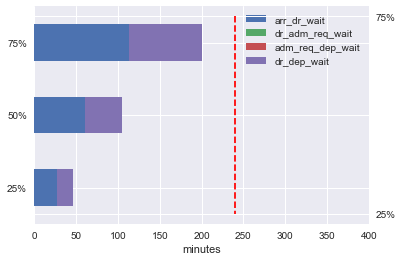

In [130]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0][wait_col2].describe().ix[['25%','50%','75%']].plot.barh(stacked=True,ax=ax);
ax.set_xlim([0,400]);
ax2 = plt.twinx()
ax2.plot([240,240], ['75%','25%'], 'r--');
ax.set_xlabel('minutes');

C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


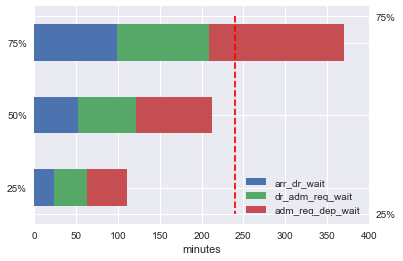

In [131]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1][wait_col2[0:3]].describe().ix[['25%','50%','75%']].plot.barh(stacked=True,ax=ax);

ax.set_xlim([0,400]);
ax2 = plt.twinx()
ax2.plot([240,240], ['75%','25%'], 'r--');
ax.set_xlabel('minutes');

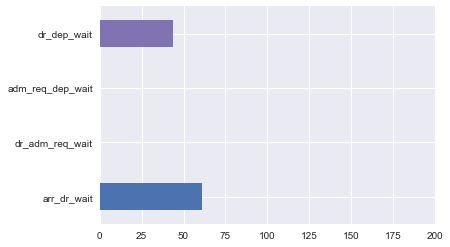

In [132]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0][wait_col2].median().plot.barh(stacked=True);
ax.set_xlim([0,200]);

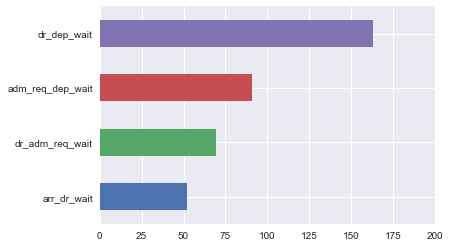

In [133]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1][wait_col2].median().plot.barh(stacked=True);
ax.set_xlim([0,200]);

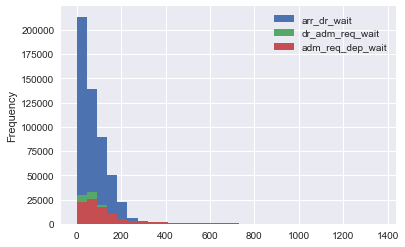

In [134]:
pat2[wait_col2[0:3]].plot.hist(stacked=False,bins=30);

auto gerenate year somethere previosu in future!!!!

In [141]:
pat2['arrive_year'] = pat2.arrive_datetime.apply(lambda x : x.year)

C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
pat2[wait_col2].isnull().sum()

arr_dr_wait             63
dr_adm_req_wait     428277
adm_req_dep_wait    428276
dr_dep_wait             63
dtype: int64

In [146]:
pat.adm_flag.value_counts()

0    421589
1    146046
Name: adm_flag, dtype: int64

In [147]:
pat2.adm_flag.value_counts()

0    401561
1    122163
Name: adm_flag, dtype: int64

In [148]:
pat[wait_col2].isnull().sum()

arr_dr_wait             64
dr_adm_req_wait     449042
adm_req_dep_wait    449041
dr_dep_wait             64
dtype: int64

In [149]:
pat[dt_cols].isnull().sum()

arrive_datetime                    0
first_triage_datetime           3987
first_dr_datetime                 64
first_adm_request_datetime    449041
depart_datetime                    0
dtype: int64

### admissions breakdown by time waiting for per speciality

#### function to select dates - return df

In [159]:
start_date = pd.datetime(2012,12,31)
end_date =  pd.datetime(2018,12,31)

mask = (pat['arrive_datetime'] > start_date) & (pat['arrive_datetime'] <= end_date)

In [160]:
pat[mask].groupby(['arrive_date']).count().head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,depart_year,depart_date,first_adm_request_datetime,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait,age_group
arrive_date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,223,223,223,223,223,221,221,223,66,65,...,223,223,66,221,223,66,66,66,223,223


# functions to call plotting

## !! Add in filter to get non-spurious cases!!!!!

In [161]:
def col_filter(df,col,values):
    """
    col: str, column name to select from
    values: list of values
    """
    return df[df[col].isin(values)]
    

In [162]:
def plot_filter(df,dow=None, months= None, years=None,include_dates=None):
    dff = df
    if include_dates != None:
        # call date selection function, retunr df2
        print('WARNING dates not yet implemented!!')
        
    if years != None:
        # call day selection function, return df2
        dff = col_filter(dff,'arrive_year',years)
        
    if months != None:
        # call day selection function, return df2
        dff = col_filter(dff,'arrive_month',months)
        
    if dow != None:
        # call day selection function, return df2
        dff = col_filter(dff,'arrive_dayofweek',dow)
    #etc 
    
    return(dff)
        
    # do plotting on df2 - groupbys
    # save plots out (how choose filenames)

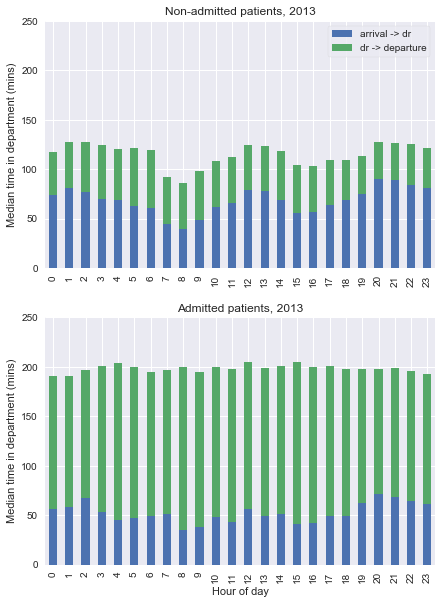

In [163]:
fig = plt.figure(figsize=(7,10))

df = plot_filter(pat2,years=[2013])

ax = plt.subplot(211)
df[df.adm_flag == 0].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250]);
ax.legend(['arrival -> dr','dr -> departure'],frameon=True)
ax.set_title('Non-admitted patients, 2013');
ax.set_xlabel('');

ax = plt.subplot(212)
df[df.adm_flag == 1].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250]);
ax.legend_.remove()
ax.set_title('Admitted patients, 2013');
ax.set_xlabel('Hour of day');


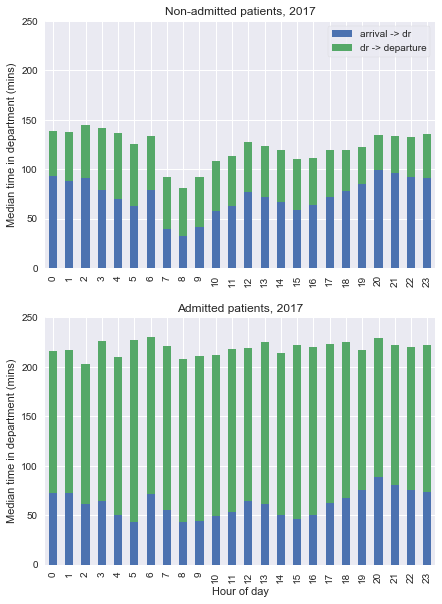

In [164]:
fig = plt.figure(figsize=(7,10))

df = plot_filter(pat2,years=[2017])

ax = plt.subplot(211)
df[df.adm_flag == 0].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250]);
ax.legend(['arrival -> dr','dr -> departure'],frameon=True)
ax.set_title('Non-admitted patients, 2017');
ax.set_xlabel('');


ax = plt.subplot(212)
df[df.adm_flag == 1].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median time in department (mins)');
ax.set_ylim([0,250]);
ax.legend_.remove()
ax.set_title('Admitted patients, 2017');
ax.set_xlabel('Hour of day');



C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Text(0.5,1,'Admitted patients,[2013]')

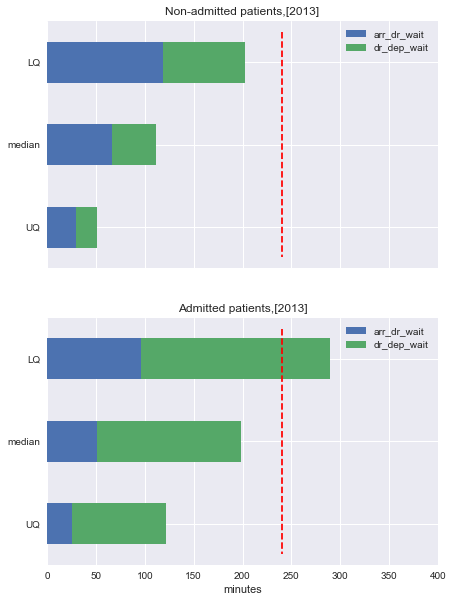

In [165]:
fig = plt.figure(figsize=(7,10))

years=[2013]

df = plot_filter(pat2,years=years)

ax = plt.subplot(211)

df[df.adm_flag == 0][wait_col].describe().ix[['25%','50%','75%']].plot.barh(stacked=True,ax=ax);
ax.set_xlim([0,400]);
ax.set_yticklabels(['UQ','median','LQ'])
ax2 = plt.twinx()
ax2.plot([240,240], ['75%','25%'], 'r--');
ax2.grid(False)
ax2.set_yticklabels('');
ax.set_xlabel('minutes');
ax.set_title('Non-admitted patients,' + str(years))

ax = plt.subplot(212)

df[df.adm_flag == 1][wait_col].describe().ix[['25%','50%','75%']].plot.barh(stacked=True,ax=ax);
ax.set_xlim([0,400]);
ax.set_yticklabels(['UQ','median','LQ'])
ax2 = plt.twinx()
ax2.plot([240,240], ['75%','25%'], 'r--');
ax2.grid(False)
ax2.set_yticklabels('');
ax.set_xlabel('minutes');
ax.set_title('Admitted patients,' + str(years))

C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


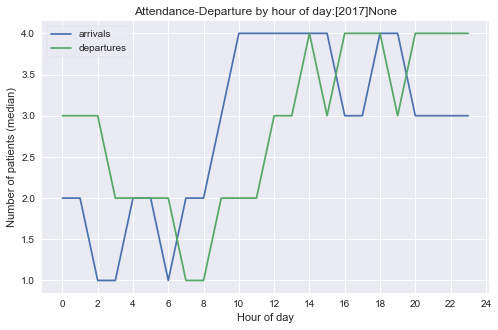

In [166]:
fig = plt.figure(figsize=(8,5))

years=[2017]
#dows = [0,1,2,3,4]
#dows=[5,6]
dows=None

df = plot_filter(pat2[pat2.adm_flag == 1],years=years,dow=dows)

ax = plt.subplot()
daily_dep = df[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = df[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()

daily_arr_UQ = daily_arr.groupby(['arrive_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_arr_LQ = daily_arr.groupby(['arrive_hour']).quantile(0.25)#['hosp_patid'].plot() 


daily_dep_UQ = daily_dep.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_dep_LQ = daily_dep.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 


ax = plt.subplot()

daily_arr_m.plot(ax=ax)


#ax.fill_between(x = daily_arr_UQ.index,y1=daily_arr_UQ['hosp_patid'],y2=daily_arr_LQ['hosp_patid'],alpha=0.2)

daily_dep_m.plot(ax=ax)
#ax.fill_between(x = daily_dep_UQ.index,y1=daily_dep_UQ['hosp_patid'],y2=daily_dep_LQ['hosp_patid'],alpha=0.2)


ax.legend(['arrivals','departures','arr IQR','dep IQR'],frameon=True,loc='upper left');
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (median)');
ax.set_xticks(np.arange(0,25,2));
ax.set_title('Attendance-Departure by hour of day:'+str(years)+str(dows));
#ax.set_ylim([0,28])

C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 5)

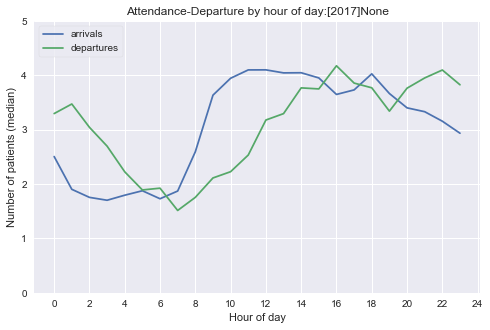

In [167]:
fig = plt.figure(figsize=(8,5))

years=[2017]
#dows = [0,1,2,3,4]
#dows=[5,6]
dows=None

df = plot_filter(pat2[pat2.adm_flag == 1],years=years,dow=dows)

ax = plt.subplot()
daily_dep = df[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = df[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_dep_m = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()
daily_arr_m = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()

daily_arr_UQ = daily_arr.groupby(['arrive_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_arr_LQ = daily_arr.groupby(['arrive_hour']).quantile(0.25)#['hosp_patid'].plot() 


daily_dep_UQ = daily_dep.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_dep_LQ = daily_dep.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 


ax = plt.subplot()

daily_arr_m.plot(ax=ax)


#ax.fill_between(x = daily_arr_UQ.index,y1=daily_arr_UQ['hosp_patid'],y2=daily_arr_LQ['hosp_patid'],alpha=0.2)

daily_dep_m.plot(ax=ax)
#ax.fill_between(x = daily_dep_UQ.index,y1=daily_dep_UQ['hosp_patid'],y2=daily_dep_LQ['hosp_patid'],alpha=0.2)


ax.legend(['arrivals','departures','arr IQR','dep IQR'],frameon=True,loc='upper left');
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (median)');
ax.set_xticks(np.arange(0,25,2));
ax.set_title('Attendance-Departure by hour of day:'+str(years)+str(dows));
ax.set_ylim([0,5])

C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 5)

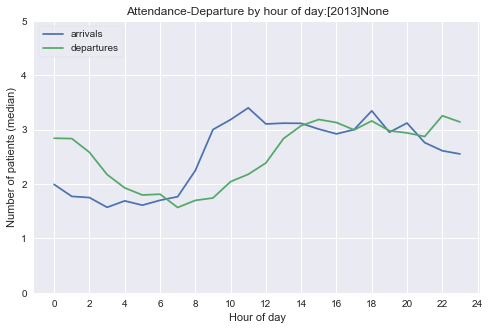

In [168]:
fig = plt.figure(figsize=(8,5))

years=[2013]
#dows = [0,1,2,3,4]
#dows=[5,6]
dows=None

df = plot_filter(pat2[pat2.adm_flag == 1],years=years,dow=dows)

ax = plt.subplot()
daily_dep = df[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = df[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_dep_m = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()
daily_arr_m = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()

daily_arr_UQ = daily_arr.groupby(['arrive_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_arr_LQ = daily_arr.groupby(['arrive_hour']).quantile(0.25)#['hosp_patid'].plot() 


daily_dep_UQ = daily_dep.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_dep_LQ = daily_dep.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 


ax = plt.subplot()

daily_arr_m.plot(ax=ax)


#ax.fill_between(x = daily_arr_UQ.index,y1=daily_arr_UQ['hosp_patid'],y2=daily_arr_LQ['hosp_patid'],alpha=0.2)

daily_dep_m.plot(ax=ax)
#ax.fill_between(x = daily_dep_UQ.index,y1=daily_dep_UQ['hosp_patid'],y2=daily_dep_LQ['hosp_patid'],alpha=0.2)


ax.legend(['arrivals','departures','arr IQR','dep IQR'],frameon=True,loc='upper left');
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (median)');
ax.set_xticks(np.arange(0,25,2));
ax.set_title('Attendance-Departure by hour of day:'+str(years)+str(dows));
ax.set_ylim([0,5])

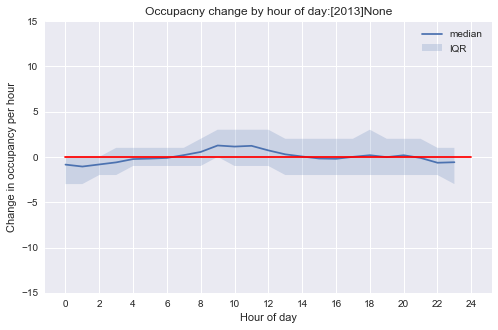

In [169]:
#### this is a follow on from above! - no filtering this time!
fig = plt.figure(figsize=(8,5))

df = plot_filter(pat2,years=years,dow=dows)

ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(ax=ax);


y1 = (daily_arr_UQ - daily_dep_LQ)['hosp_patid']
y2 = (daily_arr_LQ - daily_dep_UQ)['hosp_patid']

ax.fill_between(x = daily_dep_UQ.index,y1=y1,y2=y2,alpha=0.2)



ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour');
ax.legend(['median','IQR'])
ax.plot([0,24],[0,0],'r')
ax.set_xticks(np.arange(0,25,2));
ax.set_title('Occupacny change by hour of day:'+str(years)+str(dows));
ax.set_ylim([-15,15]);

plot to show differences in occupancy

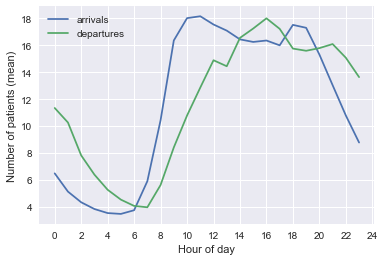

In [170]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_arr = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
daily_dep = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()


#UQ = daily.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
#LQ = daily.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 

ax = plt.subplot()
daily_arr.plot(ax=ax)
daily_dep.plot(ax=ax)

ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (mean)');
ax.set_xticks(np.arange(0,25,2));

In [171]:
plt.figure(figsize=(12,8))

In [172]:
def occ_diff_plot(df,years=None):
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot();
    if years == None:
        daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        
        daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()
        daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
        
        occ_df = (daily_arr_m-daily_dep_m)

        occ_df.plot(kind='bar',ax=ax);
        ax.set_xlabel('Hour of day');
        ax.set_ylabel('Change in occupancy (mean)');
        ax.legend([])
    else:
        # for cases where date is provided
        daily_dep = pat[pat.arrive_year == years[0]][['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[pat.arrive_year == years[0]][['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()
        daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
        
        occ_df1 = (daily_arr_m-daily_dep_m)
        
        daily_dep = pat[pat.arrive_year == years[1]][['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[pat.arrive_year == years[1]][['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()
        daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
        occ_df2 = (daily_arr_m-daily_dep_m)
                    
        occ_df = pd.merge(occ_df1,occ_df2,left_index=True,right_index=True,suffixes=('_'+ np.str(years[0]),'_'+ np.str(years[1])))
        occ_df.plot(kind='bar',ax=ax)
        
        # finish plotting

    ax.set_xlabel('Hour of day');
    ax.set_ylabel('Change in occupancy (mean)');
    ax.legend([str(years[0]),str(years[1])],frameon=True)
    return(occ_df)
            
    

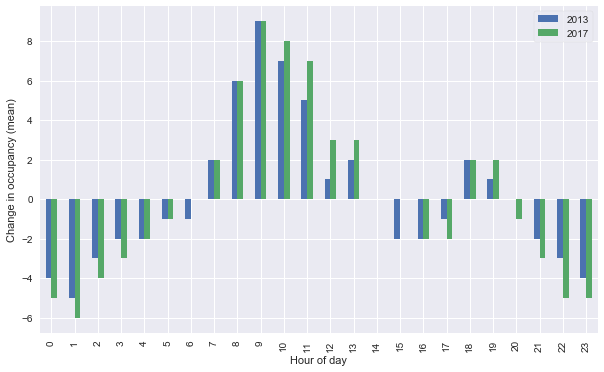

In [173]:
temp = occ_diff_plot(pat,years=[2013,2017])

In [174]:
pat[(pat.arrive_year == 2017)]['hosp_patid'].count()/365

303.80000000000001

In [175]:
temp + 7.2

,hosp_patid_2013,hosp_patid_2017
arrive_hour,,
0,3.2,2.2
1,2.2,1.2
2,4.2,3.2
3,5.2,4.2
4,5.2,5.2
5,6.2,6.2
6,6.2,7.2
7,9.2,9.2
8,13.2,13.2


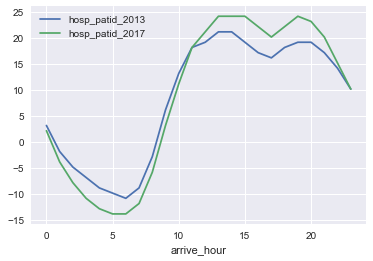

In [176]:
((temp).cumsum() + 7.2).plot()

In [177]:
def occ_diff_plot(df,years=None):
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot();
    if years == None:
        daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        
        daily_arr_m = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
        daily_dep_m = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()
        
        occ_df = (daily_arr_m-daily_dep_m)

        occ_df.plot(kind='bar',ax=ax);
        ax.set_xlabel('Hour of day');
        ax.set_ylabel('Change in occupancy (mean)');
        ax.legend([])
    else:
        # for cases where date is provided
        daily_dep = pat[pat.arrive_year == years[0]][['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[pat.arrive_year == years[0]][['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        daily_arr_m = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
        daily_dep_m = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()
        
        occ_df1 = (daily_arr_m-daily_dep_m)
        
        daily_dep = pat[pat.arrive_year == years[1]][['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[pat.arrive_year == years[1]][['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        daily_arr_m = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
        daily_dep_m = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()
        occ_df2 = (daily_arr_m-daily_dep_m)
                    
        occ_df = pd.merge(occ_df1,occ_df2,left_index=True,right_index=True,suffixes=('_'+ np.str(years[0]),'_'+ np.str(years[1])))
        occ_df.plot(kind='bar',ax=ax)
        
        # finish plotting

    ax.set_xlabel('Hour of day');
    ax.set_ylabel('Change in occupancy (mean)');
    ax.legend([str(years[0]),str(years[1])],frameon=True)
    return(occ_df)
            
    

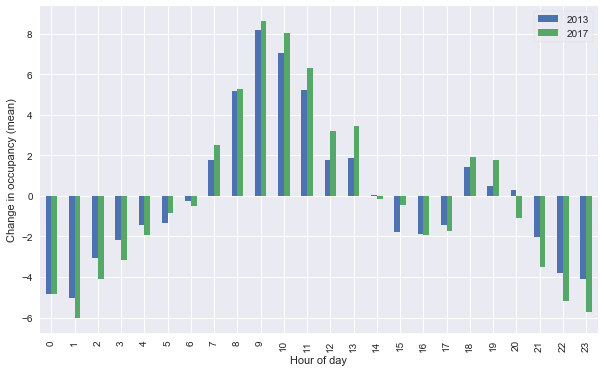

In [178]:
temp = occ_diff_plot(pat,years=[2013,2017])

In [179]:
pat[(pat.arrive_year == 2017) & (pat.arrive_hour == 0)]['hosp_patid'].count()/365

7.2136986301369861

In [180]:
pat.dep

AttributeError: 'DataFrame' object has no attribute 'dep'

In [ ]:
temp

In [ ]:
temp.cumsum().plot()

Mean arrivals

In [ ]:
ax = plt.subplot()
(pat.groupby(['arrive_hour','arrive_year']).count()['hosp_patid']/365).unstack()[[2013,2017]].plot(ax=ax,figsize=(8,5));
ax.set_ylabel('Mean patient arrivals');
ax.set_xlabel('Hour of day');
ax.set_xticks(np.arange(0,24,1));
ax.legend(title='year',frameon=True,loc='upper left');
ax.set_ylim([0,20]);

In [ ]:
ax = plt.subplot()
(pat[pat.adm_flag == 1].groupby(['arrive_hour','arrive_year']).count()['hosp_patid']/365).unstack()[[2013,2017]].plot(ax=ax,figsize=(8,5));
ax.set_ylabel('Mean patient arrivals (who are admitted)');
ax.set_xlabel('Hour of day');
ax.set_xticks(np.arange(0,24,1));
ax.legend(title='year',frameon=True,loc='upper left');
ax.set_ylim([0,20]);

In [ ]:
ax = plt.subplot()
(pat[pat.adm_flag == 0].groupby(['arrive_hour','arrive_year']).count()['hosp_patid']/365).unstack()[[2013,2017]].plot(ax=ax,figsize=(8,5));
ax.set_ylabel('Mean occupancy (no. of patients)');
ax.set_xlabel('Hour of day');
ax.set_xticks(np.arange(0,24,1));
ax.legend(title='year',frameon=True,loc='upper left');
ax.set_ylim([0,20]);

In [ ]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

In [ ]:
daily_dep.head()

In [ ]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy (mean)');
ax.legend([])

# occupancy

In [ ]:
def occ_diff_plot(df,years=None):
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot();
    if years == None:
        daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
        daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()
        
        #daily_arr_m = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
        #daily_dep_m = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()
        
        occ_df = pd.merge(daily_dep,daily_arr,left_index=True,right_index=True) #(daily_arr_m-daily_dep_m)

        occ_df.plot(kind='bar',ax=ax);
        ax.set_xlabel('Hour of day');
        ax.set_ylabel('Change in occupancy (mean)');
        ax.legend([])

    return(occ_df)
            
    

In [ ]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['arrive_date','depart_hour']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_date','arrive_hour']).count()

In [ ]:
daily_arr.head()

In [ ]:
df = pd.merge(daily_dep,daily_arr,left_index=True,right_index=True)

In [ ]:
daily_dep

In [ ]:
occ_diff_plot(pat)

 misc

In [ ]:
pat2[wait_col2[0:3]].plot.hist(stacked=False,bins=30);

In [ ]:
pat2[(pat2.adm_flag == 1) & (pat2.arrive_year == 2013)]['adm_req_dep_wait'].hist(bins=50)

In [ ]:
pat2[(pat2.adm_flag == 1) & (pat2.arrive_year == 2017)]['adm_req_dep_wait'].hist(bins=50)

In [ ]:
pat2[(pat2.adm_flag == 1) & (pat2.arrive_year == 2013)]['dr_dep_wait'].hist(bins=50)

In [ ]:
pat2[(pat2.adm_flag == 1) & (pat2.arrive_year == 2017)]['dr_dep_wait'].hist(bins=50)

In [ ]:
str(None)

In [ ]:
df.shape

# dev

In [ ]:
break

In [ ]:
path = './../../3_Data/HH_ED_Flow_Study.csv'

In [ ]:
df = pd.read_csv(path,
        low_memory=False)

In [ ]:
dt_cols = []
for i in df.columns:
    if 'DTTM' in i:
        dt_cols.append(i)

In [ ]:
df[dt_cols]

In [ ]:
df.INITIAL_ASSESSMENT_DTTM[0][0:16]

In [ ]:
df[df.INITIAL_ASSESSMENT_DTTM == '1899-12-30 00:00:00.000000'].INITIAL_ASSESSMENT_DTTM

In [ ]:
df.loc[df.INITIAL_ASSESSMENT_DTTM == '1899-12-30 00:00:00.000000', 'INITIAL_ASSESSMENT_DTTM'] = np.nan

In [ ]:
'1899-12-30 00:00:00.000000'[0:16]

In [ ]:
df['ARRIVAL_DTTM'].dtype

In [ ]:
def convert_cols_datetime(x,col_names = None):
    """ convert either all columns with datetime in name to type datetime, or if col_names given only convert slected cols.
    input
    x: df,
    col_names: list of str, optional containing names of columns to convert
    return: new type converted df
    """
    print(40*'-')
    print('Converting cols to datetime...(may take some time depedning on size of df)...')
    print(20*'-')
    if col_names == None:
        for i in x.columns:
            if ('datetime' in i) & (x[i].dtype != np.dtype('datetime64[ns]')):
                #### selected cols have datetime in name and are not of type datetime64
                print(i)
                x[i] = pd.to_datetime(x[i])
    else:
        for i in col_names:
            print(i)
            x[i] = pd.to_datetime(x[i])
    print(20*'-')
    print('Conversion complete.')
    print(20*'-')

    return(x)

In [ ]:
x = df[['ARRIVAL_DTTM','ATTENDANCE_CONCLUSION_DTTM']]#[-2000:]

In [ ]:
x.tail()

In [ ]:
df2 = convert_cols_datetime(df,col_names = ['ARRIVAL_DTTM'])

In [ ]:
df2.ARRIVAL_DTTM.dtype

In [ ]:
df2['arrive_year'] = df2['ARRIVAL_DTTM'].apply(lambda x : x.year)

In [ ]:
for x in df2.columns:
    print(x)

In [ ]:
df2.groupby('arrive_year').sum()['ADMISSION_FLAG']

In [ ]:
df.col

In [ ]:
df2.tail()

08/02/2018 22:24

In [ ]:
raise Exception('Problem!')

In [ ]:
i = 'ARRIVAL_DTTM'

In [ ]:
y = pd.to_datetime(x[i],format="%d/%m/%Y %H:%M")

In [ ]:
y

In [ ]:
x

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_date',
'ARRIVAL_DTTM':'arrival_time',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_time',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_time',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_time',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)



hh.ioED.checks()


In [ ]:
hh.ioED.get_EDraw()

In [ ]:
test.head()

In [ ]:
test.minutes_today.sum()

In [ ]:
test.columns


In [ ]:
pd.to_datetime(test.leaving_time)

In [ ]:
df

In [ ]:
df.head(1)

In [ ]:
df.index

In [ ]:
df['year'] = df.apply(lambda x: x.name.year ,axis=1)
df['year'] = df.apply(lambda x: x.name.year ,axis=1)
df['year'] = df.apply(lambda x: x.name.year ,axis=1)

df['date'] = df.index

In [ ]:
df.date.values

In [ ]:
df.date.values[0] #.astype(datetime)

In [ ]:
pd.to_datetime(df.date.values).weekday_name

# prefix to all cols test

In [ ]:
def prefix_cols(x,prefix):
    """ adds string prefix to all col names"""
    for i in df.columns:
        x.rename(columns={i:prefix + i},inplace=True)

In [ ]:
prefix_cols(df,'ED_')

In [ ]:
df

In [ ]:
df

In [ ]:
pd.to_datetime(df.index)

# Dev

In [ ]:
break

In [ ]:
#import dep
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# local import
from hospital import *

In [ ]:
hh = hosp('hh')

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_datetime',
'STREAM_LOCAL_CODE':'stream'
}

In [ ]:
### import data
hh.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh.ioED.checks()

In [ ]:
df = hh.ioED.get_EDraw()
df = df[0:100]
hh.ioED.replace_EDraw(df)


In [ ]:
hh.ioED.convert_cols_datetime()

In [ ]:
hh.ioED.checks()

In [ ]:
hh.ioED.create_auto_columns()

In [ ]:
hh.ioED.checks()

In [ ]:
hh.ioED.get_EDraw().columns

In [ ]:
hh.ioED.

In [ ]:
df.shape

In [ ]:
df.arrival_datetime.dtype

In [ ]:
pd.to_datetime(df.arrival_datetime).dtype

In [ ]:
if ('datetime' in 'test_col_datetime') & (1 == 2):
    print('True')

In [ ]:
if not np.float in [np.int,np.float]:
    print('True')

In [ ]:
np.float in np.float

# check yearly counts

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_datetime',
'STREAM_LOCAL_CODE':'stream'
}

In [ ]:
hh = pd.read_csv('./../../3_data/HH_ED_Flow_Study.csv',usecols=hh_cols)

In [ ]:
hh['datetime'] = pd.to_datetime(hh.ARRIVAL_DTTM)

In [ ]:
hh['year'] = hh.datetime.apply(lambda x : x.year)

In [ ]:
hh.groupby(['year']).count()

In [ ]:
hh

In [ ]:
hh.duplicated().value_counts()

In [ ]:
hh.head(1)

In [ ]:
hh.columns

In [ ]:
for x in hh.columns:
    print(x)

In [ ]:
hh.head(1)

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrive_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrive_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'adm_flag',
'ATTENDANCE_CONCLUSION_DTTM':'depart_datetime',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh2.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh2 = hosp('hh2')

In [ ]:
hh2.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh2.ioED._dataRAW.columns

In [ ]:
hh2.ioED.get_EDraw().first_adm_request_time.isnull().value_counts()

In [ ]:
df = pd.read_csv('./../../3_Data/HH_ED_Flow_Study.csv')

In [ ]:
df.columns

In [ ]:
for i in df.columns:
    print(i)

In [ ]:
df[['ADMISSION_FLAG',
'INPATIENT_BED_REQUEST_TIME',
'SPECIALTY_REQUEST_TIME',
'WARD_REFERRED_TO',
'SPECIALTY_REFERRED_TO_CODE',
'SPECIALTY_REFERRED_TO_DESCRIPTION']].isnull().sum()

In [ ]:
df.ADMISSION_FLAG.value_counts()

In [ ]:
df.shape

In [ ]:
567635 - 449041

In [ ]:
df[~df.SPECIALTY_REQUEST_TIME.isnull()].SPECIALTY_REQUEST_TIME

# code removed from above after moving to atom files

In [ ]:
np.float,np.float64

In [ ]:
def f(x):
    y = str(x.arrive_date) + ' ' + x.first_adm_request_time
    return y

In [ ]:
mask = ~pat.first_adm_request_time.isnull()

In [ ]:
pat['first_adm_request_datetime'] = pat[mask].apply(f,axis=1) # add date and time together

In [ ]:
pat.first_adm_request_datetime.isnull().value_counts()

In [ ]:
pat[mask].shape

In [ ]:
pat['first_adm_request_datetime'] = pat[mask]['first_adm_request_datetime'].apply(lambda x: pd.to_datetime(x)) # convert str to datetime

In [ ]:
pat.first_adm_request_datetime.isnull().value_counts()

add + 1D to all values where patient has overlapped midnight

In [ ]:
mask = (pat['first_adm_request_datetime'] - pat['arrive_datetime']) < pd.Timedelta(0, unit='D')

In [ ]:
mask.value_counts()

In [ ]:
pat.loc[pat[mask].index,'first_adm_request_datetime'] = pat[mask]['first_adm_request_datetime'] + pd.Timedelta(1, unit='D')

In [ ]:
pat.first_adm_request_datetime.isnull().value_counts()

In [ ]:
test = (pat['first_adm_request_datetime'] - pat['arrive_datetime']) < pd.Timedelta(0, unit='D')

In [ ]:
test.value_counts()

##### note that we've preserved all datetimes at this point - it's when taking the differences that some get lost

create minutes waited at each stage for each patient

In [ ]:
pat.columns

In [ ]:
pat['arr_triage_wait'] = (pat.first_triage_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['arr_dr_wait'] = (pat.first_dr_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['arr_adm_req_wait'] = (pat.first_adm_request_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['adm_req_dep_wait'] = (pat.depart_datetime - pat.first_adm_request_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['dr_adm_req_wait'] = (pat.first_adm_request_datetime - pat.first_dr_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['dr_dep_wait'] = (pat.depart_datetime - pat.first_dr_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat.dr_dep_wait.describe()

In [ ]:
pat[pat.dr_dep_wait < -10].adm_flag.value_counts()

In [ ]:
# pat[pat.dr_dep_wait < -10][dt_cols]

In [ ]:
pat.first_adm_request_time.isnull().value_counts()

doulbe check admission flag

In [ ]:
pat.adm_flag.value_counts()

In [ ]:
mask = pat.first_adm_request_time.isnull()

In [ ]:
pat.loc[pat[~mask].index,'adm_flag'] = 1

In [ ]:
pat.adm_flag.value_counts()

adm_flag should now contain all admissions for patietns who have a bed request time. Maybe this is erroneus?